In [12]:
%matplotlib inline
import os
import pickle

os.environ["KERAS_BACKEND"] = "tensorflow"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
)
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

from skimage.io import imread
# skimage.io.imshow is deprecated use matplotlib.pyplot.imshow instead
from skimage import data, color, io, filters, morphology,transform, exposure, feature, util
from scipy import ndimage
#import Tensorflow namespaces

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.preprocessing import image

from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input, decode_predictions




In [13]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [14]:
# Load training set and test set

training_data = unpickle('./cifar-10/data_batch_1')
test_data = unpickle('./cifar-10/test_batch')
print(f"{type(training_data) = }")
print(f"{type(training_data[b'data']) = }, {training_data[b'data'].shape = }, ")
print(f" {training_data[b'data'][0] = }")
# print(training_data.keys())
# print(type(training_data[b"data"]))
# print(training_data[b"data"].shape)
# print(training_data[b"data"])
# print("===================")
# print(training_data[b"data"][1])
# print("===================")
# rs1 = training_data[b"data"].reshape(len(X_train),3,32,32)
# print("+++++++++++++++++++")
# print(rs1[1, 0])
# print("+++++++++++++++++++")
# print(rs1)

type(training_data) = <class 'dict'>
type(training_data[b'data']) = <class 'numpy.ndarray'>, training_data[b'data'].shape = (10000, 3072), 
 training_data[b'data'][0] = array([ 59,  43,  50, ..., 140,  84,  72], dtype=uint8)


In [15]:
#training_data

In [16]:
# Create training set and test set

X_train = training_data.get(b'data')
train_labels = training_data.get(b'labels')

X_test = test_data.get(b'data')
test_labels = test_data.get(b'labels')

# Reshape into Tensorflow format (number of images, width, height, color channels)

X_train = X_train.reshape((len(X_train),3,32,32)).transpose(0,2,3,1)
X_test  = X_test.reshape((len(X_test),3,32,32)).transpose(0,2,3,1)

print(X_train.shape)
print(X_test.shape)

(10000, 32, 32, 3)
(10000, 32, 32, 3)


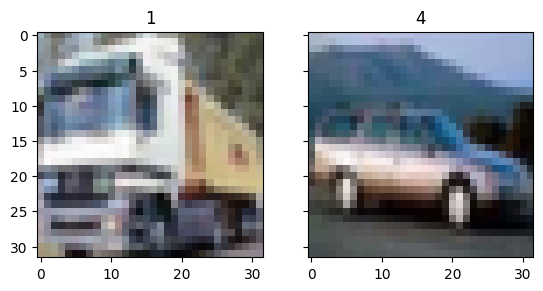

In [17]:
# Show image

fig, axes = plt.subplots(1, 2, sharey=True)
axes[0].set_title("1")
axes[0].imshow(X_train[1])
axes[1].set_title("4")
axes[1].imshow(X_train[4])
# plt.axis('off')  # Hide axes
# plt.show()


In [18]:
# Image normalization

# Normalisatie
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# one-hot encoding of the labels

y_train = to_categorical(train_labels)
y_test = test_labels

In [19]:
# Neural network parameters
#-----------------------------------------------
#-----------------------------------------------
batch_size = 64 # 
epochs = 150 # 
#-----------------------------------------------
#-----------------------------------------------
num_classes = 10
img_rows, img_cols = 32, 32
input_shape = (img_rows, img_cols,3)  # drie-kleuren kanaal

# Model
model = Sequential()
#-----------------------------------------------
#-----------------------------------------------
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',input_shape=input_shape)) # Eerste parameter = aantal features die wordt gezocht
model.add(BatchNormalization())
# model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#-----------------------------------------------
model.add(Dropout(0.3)) # Value between 0 and 1 
model.add(BatchNormalization())
#-----------------------------------------------
model.add(Conv2D(32, (3, 3), activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2)))
#-----------------------------------------------
model.add(Dropout(0.3)) # Value between 0 and 1 
#-----------------------------------------------
model.add(BatchNormalization())
#-----------------------------------------------
#-----------------------------------------------
model.add(Flatten()) 
model.add(Dense(50, activation='relu')) 
#-----------------------------------------------
#-----------------------------------------------
model.add(Dropout(0.2)) # Value between 0 and 1 
#-----------------------------------------------
#-----------------------------------------------
model.add(Dense(num_classes, activation='softmax'))

# model.compile(loss='hinge',
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

display(model.summary())
# plot_model(model)




/home/sam/howest/howest-dl/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 15, 15, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 6, 6, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 50)             │        57,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 68,688 (268.31 KB)

 Trainable params: 68,496 (267.56 KB)

 Non-trainable params: 192 (768.00 B)

None

In [20]:
# Trainen van het CNN
history = model.fit(X_train, y_train,batch_size=batch_size, epochs=epochs, validation_split=0.2, verbose=1)

Epoch 1/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.2110 - loss: 2.3799 - val_accuracy: 0.1400 - val_loss: 3.1342
Epoch 2/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3746 - loss: 1.7494 - val_accuracy: 0.1235 - val_loss: 2.9487
Epoch 3/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4293 - loss: 1.5923 - val_accuracy: 0.1825 - val_loss: 2.6585
Epoch 4/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4709 - loss: 1.4602 - val_accuracy: 0.3270 - val_loss: 1.9655
Epoch 5/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4980 - loss: 1.3789 - val_accuracy: 0.3685 - val_loss: 1.8652
Epoch 6/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5297 - loss: 1.3100 - val_accuracy: 0.4305 - val_loss: 1.6464
Epoch 7/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5498 - loss: 1.2358 - val_accuracy: 0.4690 - val_loss: 1.5114
Epoch 8/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5618 - loss: 1.2200 - val_acc

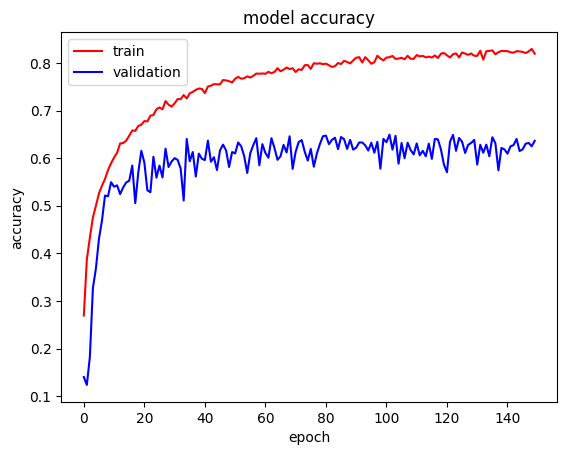

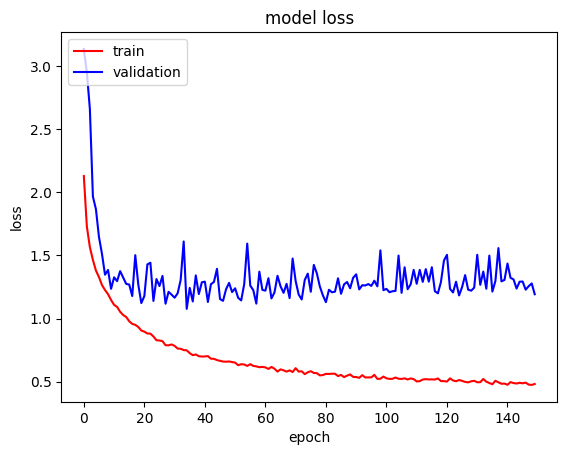

In [21]:
# Plot of the training history

# Accuray 
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'b')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# Loss 
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [22]:
# Testing with the test set

y_pred = model.predict(X_test)
y_pred_proba = model.predict(X_test)
print("y_pred_proba")
print(y_pred_proba.shape)
print(y_pred_proba)
y_pred_class = np.argmax(y_pred_proba, axis=1)
print("y_pred_proba")
print(y_pred_class.shape)
print(y_pred_class)

print('\n')
print(classification_report(y_test, y_pred_class))

cf = confusion_matrix(y_test, y_pred_class)
print(cf)

print("First 20 test entries vs first 20 predicted entries")
print("Test     :", type(y_test), y_test[:20])
print("Predicted:", type(y_pred_class), y_pred_class[:20])
print(accuracy_score(y_test, y_pred_class) * 100) 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
y_pred_proba
(10000, 10)
[[1.2072089e-02 6.5618974e-06 1.9979949e-01 ... 1.7809619e-03
  2.2593543e-03 2.9494469e-03]
 [6.4617246e-02 7.4262366e-02 3.4741148e-09 ... 1.2021882e-11
  8.6111563e-01 4.7118083e-06]
 [2.3161928e-01 1.8221429e-02 2.4091058e-04 ... 5.5208625e-06
  6.8606269e-01 6.3647538e-02]
 ...
 [3.5451361e-08 1.6930223e-08 5.0374489e-02 ... 5.3971995e-02
  1.0934144e-06 4.4974831e-07]
 [2.0377019e-03 9.0933734e-01 1.4799325e-03 ... 3.8198803e-05
  1.8620171e-04 1.2932149e-03]
 [1.6862975e-08 4.6284726e-11 1.0013242e-05 ... 9.9688655e-01
  7.3109982e-12 5.5579180e-11]]
y_pred_proba
(10000,)
[3 8 8 ... 5 1 7]


              precision    recall  f1-score   support

           0       0.67      0.66      0.66      1000
           1       0.75      0.79      0.77      1000
           2       0.48      0.54      0.51      1000
           3       0.49      0.36      0.41      1000
           4    

### Transferlearning via VGG19

In [23]:
# include_top = False  ==> De classifier wordt niet gebruikt, dus alleen de feature extractor wordt gekopieerd.
modelVGG19 = tf.keras.applications.vgg19.VGG19(include_top=False, weights='imagenet', input_shape=(32,32,3))
type(modelVGG19)

keras.src.models.functional.Functional

In [24]:
# Convert to Keras model

model = Sequential()

for layer in modelVGG19.layers[:]:
    model.add(layer)

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ block1_conv1 (Conv2D)           │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,024,384 (76.39 MB)

 Trainable params: 20,024,384 (76.39 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
# set coefficients to fixed

# Freeze the neural weights
for layer in model.layers:
    layer.trainable = False

# Add custom dense layers
model.add(Flatten()) 
model.add(Dense(100))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dense(10,activation='softmax'))

In [26]:
adam = tf.keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy',optimizer =adam,metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ block1_conv1 (Conv2D)           │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        51,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 20,077,094 (76.59 MB)

 Trainable params: 52,510 (205.12 KB)

 Non-trainable params: 20,024,584 (76.39 MB)

In [27]:
X_train = preprocess_input(X_train)

In [28]:
display(X_train)

array([[[[-103.69195 , -116.535866, -123.44863 ],
         [-103.762535, -116.59861 , -123.511375],
         [-103.77038 , -116.59077 , -123.483925],
         ...,
         [-103.51547 , -116.26135 , -123.060394],
         [-103.539   , -116.2888  , -123.08392 ],
         [-103.53508 , -116.292725, -123.09961 ]],

        [[-103.86057 , -116.70057 , -123.617256],
         [-103.939   , -116.779   , -123.68    ],
         [-103.939   , -116.74763 , -123.60941 ],
         ...,
         [-103.72332 , -116.4339  , -123.19765 ],
         [-103.74293 , -116.45351 , -123.21333 ],
         [-103.71548 , -116.43782 , -123.20157 ]],

        [[-103.85665 , -116.68488 , -123.58196 ],
         [-103.939   , -116.75155 , -123.617256],
         [-103.90763 , -116.67312 , -123.48785 ],
         ...,
         [-103.74293 , -116.449585, -123.217255],
         [-103.74293 , -116.449585, -123.20941 ],
         [-103.7743  , -116.49272 , -123.25255 ]],

        ...,

        [[-103.56253 , -116.112335, -1

In [59]:
# Train VGG model
batch_size =256
epochs = 50
history = model.fit(X_train, y_train, batch_size=batch_size,  validation_split =0.2, epochs=epochs, verbose=1)

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 140ms/step - accuracy: 0.1729 - loss: 2.3530 - val_accuracy: 0.0965 - val_loss: 5.9609
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.3086 - loss: 1.9213 - val_accuracy: 0.0955 - val_loss: 6.2588
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.3504 - loss: 1.8402 - val_accuracy: 0.0990 - val_loss: 7.5646
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.3715 - loss: 1.7775 - val_accuracy: 0.1040 - val_loss: 9.0592
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.3872 - loss: 1.7331 - val_accuracy: 0.1595 - val_loss: 9.4138
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.3967 - loss: 1.6917 - val_accuracy: 0.1485 - val_loss: 10.7443
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.4059 - loss: 1.6777 - val_accuracy: 0.1045 - val_loss: 10.7735
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.4138 - loss: 1.6578 - val_accuracy: 0.1175 